## 코로나 관련 소비 형태소 분석 - 다음

In [7]:
import pandas as pd 
import numpy as np

In [8]:
import requests
from bs4 import BeautifulSoup

BeautifulSoup을 이용한 뉴스 본문 내용 크롤링 

In [1]:
#빈리스트 이용해서 기사 제목, 본문 요약, url 담기
news_list = []

- 제목 = title, 본문 = source, Url = content

news_list를 데이터 프레임으로 만들게 되면 중복된 요소들이 많아 중복된 기사의 내용 제거 후 인덱스 재정렬

In [5]:
news_list = pd.DataFrame(news_list)
news_list = news_list.drop_duplicates()
news_list = news_list.reset_index(drop = True)
news_list.head(5)

,title,source,content
0,"신세계TV쇼핑, 매달 스페셜 쇼핑데이 연다",(사진=신세계TV쇼핑) [이데일리 함지현 기자]신세계TV쇼핑은 오는 27일 ‘신세계...,http://v.media.daum.net/v/20190926060028020
1,올해 이커머스 쇼핑 키워드는 '1인 쇼핑·1일 할인',인터파크가 2019년 온라인 쇼핑 트렌드를 '1인 쇼핑과 1일 할인으로 선정했다. ...,http://v.media.daum.net/v/20191205142831330
2,"경남은행, 쇼핑 최적화 '요즘쇼핑카드' 출시",BNK경남은행이 20일 쇼핑에 최적화된 '요즘쇼핑카드'를 출시했다./사진제공=경남은...,http://v.media.daum.net/v/20190920163221170
3,"출근길 음악 들으며 쇼핑을..신세계TV쇼핑, 색다른 모바일 방송 ...",[사진 제공 = 신세계TV쇼핑] 신세계TV쇼핑이 음악과 쇼핑을 함께 즐기는 신개념 ...,http://v.media.daum.net/v/20191121104802734
4,AI쇼핑 시대 활짝..네이버쇼핑 이용자 80% 'AiTEMS' 쓴다,네이버쇼핑이 인공지능(AI) 쇼핑 강자로 급부상했다. 딥 러닝(인공 신경망을 이용한...,http://v.media.daum.net/v/20191017143526132


news_list에서는 언론사를 따로 알 수 없으므로, 다음뉴스 태그 부분이 아닌 언론사 뉴스 태그 부분을 newslist2에 가지고 온 후 위의 작업을 수행함 
concat을 이용하여 news_list와 newslist2 합침 

In [9]:
news_list2 = pd.DataFrame(news_list2)

news_list2 = news_list2.drop_duplicates()


news_list2 = news_list2.reset_index(drop = True)
#news_list2.head(5)

news_df = pd.concat([news_list2,news_media],axis=1)

news_df.head()

,source,content,media,news_media
0,(사진=신세계TV쇼핑) [이데일리 함지현 기자]신세계TV쇼핑은 오는 27일 ‘신세계...,http://v.media.daum.net/v/20190926060028020?f=o,2019.09.26 | 이데일리 | 다음뉴스,이데일리
1,인터파크가 2019년 온라인 쇼핑 트렌드를 '1인 쇼핑과 1일 할인으로 선정했다. ...,http://v.media.daum.net/v/20191205142831330?f=o,2019.12.05 | 디지털타임스 | 다음뉴스,디지털타임스
2,BNK경남은행이 20일 쇼핑에 최적화된 '요즘쇼핑카드'를 출시했다./사진제공=경남은...,http://v.media.daum.net/v/20190920163221170?f=o,2019.09.20 | 머니투데이 | 다음뉴스,머니투데이
3,[사진 제공 = 신세계TV쇼핑] 신세계TV쇼핑이 음악과 쇼핑을 함께 즐기는 신개념 ...,http://v.media.daum.net/v/20191121104802734?f=o,2019.11.21 | 매일경제 | 다음뉴스,매일경제
4,네이버쇼핑이 인공지능(AI) 쇼핑 강자로 급부상했다. 딥 러닝(인공 신경망을 이용한...,http://v.media.daum.net/v/20191017143526132?f=o,2019.10.17 | 전자신문 | 다음뉴스,전자신문


14:-8를 통해 언론사 부분만 가지고 옴 그 후 수집해온 데이터에서 언론사 카운트

In [8]:
news_media= []
for i in range(0,len(news_list2['media'])):
    a={}; 
    a['news_media'] = (news_list2['media'][i][14:-8]);
    news_media.append(a)
news_media = pd.DataFrame(news_media)
news_media.value_counts()

news_media
이데일리          7
머니투데이         5
아시아경제         5
매일경제          5
뉴스1           4
MBN           4
전자신문          4
파이낸셜뉴스        3
아이뉴스24        3
데일리안          3
디지털타임스        3
정책브리핑         3
연합뉴스          3
지디넷코리아        3
서울신문          2
중앙일보          2
세계일보          2
문화일보          2
한국경제          2
뉴시스           2
스포츠동아         2
티브이데일리        1
조선일보          1
조선비즈          1
채널A           1
쿠키뉴스          1
텐아시아          1
KBS           1
엑스포츠뉴스        1
스포티비뉴스        1
스포츠조선         1
MBC           1
스타투데이         1
스타뉴스          1
서울경제          1
마이데일리         1
동아일보          1
노컷뉴스          1
국민일보          1
경향신문          1
MK스포츠         1
한국일보          1
dtype: int64

- 언론사 컨택

In [10]:
mediaName = pd.read_csv('capston/media_name.csv')
mediaName

,news_media
0,경향신문
1,국민일보
2,뉴스1
3,뉴시스
4,동아일보
...,...
135,포토친구
136,뉴스와이어
137,뉴시스와이어
138,연합뉴스 보도자료


In [11]:
Media_count = []
Notcount ={}
mediaName['count'] = 0; 

for i in range(0,len(news_df['news_media'])):
    for j in range(0,len(mediaName['news_media'])):
        if (news_df['news_media'][i] == mediaName['news_media'][j]):
            mediaName['count'][j] += 1
mediaName

<ipython-input-11-3efa8e0511a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediaName['count'][j] += 1


,news_media,count
0,경향신문,1
1,국민일보,1
2,뉴스1,4
3,뉴시스,2
4,동아일보,1
...,...,...
135,포토친구,0
136,뉴스와이어,0
137,뉴시스와이어,0
138,연합뉴스 보도자료,0


In [12]:
news_list['content']

0     http://v.media.daum.net/v/20190926060028020
1     http://v.media.daum.net/v/20191205142831330
2     http://v.media.daum.net/v/20190920163221170
3     http://v.media.daum.net/v/20191121104802734
4     http://v.media.daum.net/v/20191017143526132
                         ...                     
85    http://v.media.daum.net/v/20191015140628676
86    http://v.media.daum.net/v/20191129050146672
87    http://v.media.daum.net/v/20190904130721845
88    http://v.media.daum.net/v/20191203120059925
89    http://v.media.daum.net/v/20190821091915171
Name: content, Length: 90, dtype: object

news_list['content']의 부분이 url 부분이였으므로, 본문 기사를 가져오기 위해 사용 

위의 크롤링 방식을 이용해 본문 내용 가지고 옴 but 정제되어 있지 않음

In [14]:
real_contents = pd.DataFrame(real_contents)
real_contents.head(5)

,content
0,\n\n\n\n (사진=신세계TV쇼핑)\n \...
1,\n\n\n\n 인터파크가 2019년 온라인 쇼핑 트렌드를 '1...
2,\n\n\n\n BNK경남은행이 20일 쇼핑에 최적화된 '요즘쇼...
3,\n\n\n\n [사진 제공 = 신세계TV쇼핑]\n ...
4,\n네이버쇼핑이 인공지능(AI) 쇼핑 강자로 급부상했다. 딥 러닝(인공 신경망을 이...


In [15]:
import requests
from bs4 import BeautifulSoup
import math
import pandas
import re
import operator
import time
import datetime
from konlpy.tag import Komoran

필요한 클랜징 부분들을 정규화 된 표현식으로 지운 후 real_contents['contentNew']에 저장 후, 
Okt()를 이용한 명사 형태소 분석 

 Okt()를 이용한 명사 형태소 분석한 것을 nouns열에 저장 

In [18]:
real_contents.head()

,content,contentNew,nouns
0,\n\n\n\n (사진=신세계TV쇼핑)\n \...,사진 신세계 쇼핑 이데일리 함지현 기자 신세계 쇼핑은 오는 일 신세계 쇼핑 데이 ...,"[사진, 신세계, 쇼핑, 이데일리, 지현, 기자, 신세계, 쇼핑, 신세계, 쇼핑, ..."
1,\n\n\n\n 인터파크가 2019년 온라인 쇼핑 트렌드를 '1...,인터파크가 년 온라인 쇼핑 트렌드를 인 쇼핑과 일 할인으로 선정했다 인터파크 제공...,"[인터파크, 온라인, 쇼핑, 트렌드, 쇼핑, 할인, 선정, 인터파크, 제공, 디지털..."
2,\n\n\n\n BNK경남은행이 20일 쇼핑에 최적화된 '요즘쇼...,경남은행이 일 쇼핑에 최적화된 요즘쇼핑카드 를 출시했다 사진제공 경남은행 경남은행...,"[경남, 은행, 쇼핑, 최적화, 요즘, 쇼핑, 카드, 출시, 사진, 제공, 경남, ..."
3,\n\n\n\n [사진 제공 = 신세계TV쇼핑]\n ...,사진 제공 신세계 쇼핑 신세계 쇼핑이 음악과 쇼핑을 함께 즐기는 신개념 쇼핑 방송...,"[사진, 제공, 신세계, 쇼핑, 신세계, 쇼핑, 음악, 쇼핑, 개념, 쇼핑, 방송,..."
4,\n네이버쇼핑이 인공지능(AI) 쇼핑 강자로 급부상했다. 딥 러닝(인공 신경망을 이...,네이버쇼핑이 인공지능 쇼핑 강자로 급부상했다 딥 러닝 인공 신경망을 이용한 데이터...,"[네이버, 쇼핑, 인공, 지능, 쇼핑, 급부, 러닝, 인공, 신경망, 이용, 데이터..."


### apriori 기법 활용

word_list= 따로 불용어 지정, media_list = 언론사 이름 제거

In [19]:
from apyori import apriori

word_list = ['사진', '뉴스', '기자', '쇼핑','제공'] 
media_list = mediaName['news_media'].tolist()

transactions = real_contents['nouns'].tolist()
transactions[0] = [noun for noun in transactions[0] if transactions[0] not in word_list]
transactions[0] = [noun for noun in transactions[0] if transactions[0] not in media_list]
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지합니다.
#transactions

In [20]:
from apyori import apriori
# 연관 분석을 수행합니다.
results = list(apriori(transactions,
    min_support=0.06,
    min_confidence=0.05,
    min_lift=1.0,
    max_length=2))
#print(results)


In [21]:
# 데이터 프레임 형태로 정리 후 
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환
for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.info()
#network_df를 support(지지도)에 가중치를 둔 샘플링 100개 뽑음
network_df= network_df.sample(n=100,
          weights='support'
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   source   5110 non-null   object 
 1   target   5110 non-null   object 
 2   support  5110 non-null   float64
dtypes: float64(1), object(2)
memory usage: 119.9+ KB


In [22]:
# 말뭉치를 추출 -> real_contents['contentNew']의 경우 본문 내용 정제 [ 명사 형태소 X]
corpus = "".join(real_contents['contentNew'].tolist())

In [23]:
import nltk
from collections import Counter
from wordcloud import WordCloud
word_list = ['사진', '뉴스', '기자', '쇼핑','제공']
media_list = mediaName['news_media'].tolist()

# 명사 키워드를 추출 [불용어와 언론사 이름 지우기]
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(corpus)
nouns = [noun for noun in nouns if noun not in word_list]
nouns = [noun for noun in nouns if noun not in media_list]

count = Counter(nouns)

# 한글자 키워드를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})

# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize']) 
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 ‘nodesize’ 50 이하는 제거 [ 기자라는 부분이 50이기도 했음 ]

node_df

,node,nodesize
0,신세계,84
3,행사,62
5,진행,66
7,방송,108
10,브랜드,51
12,상품,236
16,할인,88
23,구매,95
58,판매,109
68,홈쇼핑,61


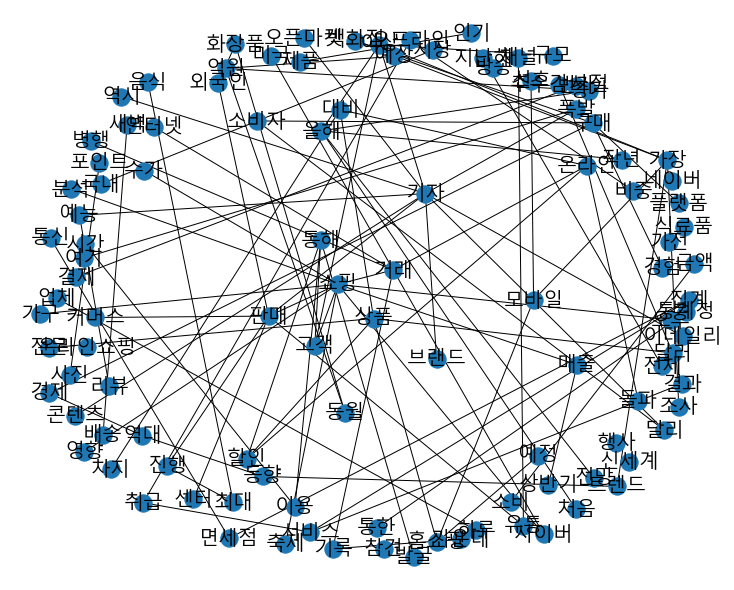

In [27]:
import nltk
from collections import Counter
from wordcloud import WordCloud
import nltk
from matplotlib import font_manager, rc

import networkx as nx

#폰트 지정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize=(10,8))

# networkx 그래프 객체를 생성
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터를 설정 이때, 실패한 부분은 노드의 크기별로 시각화 나타내지 못함 
#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, k=0.6, iterations=50)

nx.draw(G, pos=pos)

nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=20)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()

In [26]:
import requests
from bs4 import BeautifulSoup
import math
import pandas
import re
import operator
import time
import datetime
from konlpy.tag import Komoran

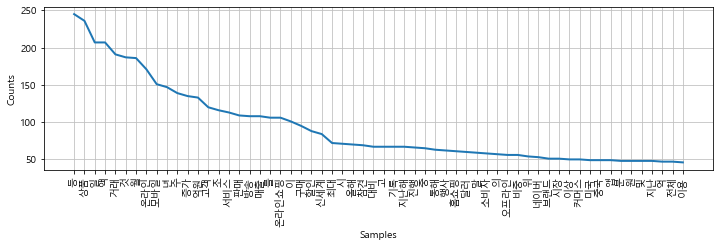

In [25]:
from nltk import Text
import matplotlib.pyplot as plt
from collections import Counter

plt.figure(figsize=(12, 3))
kolaw = Text(nouns, name="kolaw")
kolaw.plot(60)
plt.show()

워드 클라우드 시각화

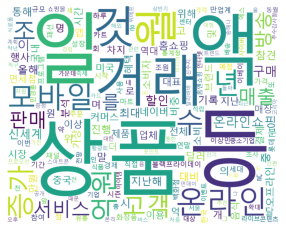

<Figure size 432x288 with 0 Axes>

In [28]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = 'c:/Windows/Fonts/malgun.ttf'

wc = WordCloud(width = 1000, height = 800, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()
plt.savefig("wordcloud2019")

- 2020년도 데이터 

news_list4의 경우 아까의 news_list 부분과 같은 실행을 함.

In [29]:
news_list4 = []

In [30]:
news_list4 = pd.DataFrame(news_list4)
news_list4 = news_list4.drop_duplicates()
news_list4 = news_list4.reset_index(drop = True)
news_list4.head()

#news_list4[news_list4['content'].isnull()]

,title,source,content
0,히트 상품도 바꾼 코로나..쇼핑 검색 1위는 '마스크',[서울=뉴시스] 손정빈 기자 = 코로나 사태가 쇼핑 검색어를 바꿔놨다. TV홈쇼핑 ...,http://v.media.daum.net/v/20201214091912595
1,"변종 코로나에도 ""쇼핑은 해야 돼~""",정부가 영국에서 유행 중인 코로나19 변이 바이러스의 국내 전파를 차단하기 위해 연...,http://v.media.daum.net/v/20201227095935260
2,코로나시대 쇼핑은 블랙프라이데이 대신 사이버 먼데이,[이미지출처=EPA연합뉴스] [아시아경제 뉴욕=백종민 특파원] 신종 코로나바이러스 ...,http://v.media.daum.net/v/20201202053011409
3,"롯데쇼핑, '코로나 블루' 극복 위한 맞춤 심리상담",비대면으로 심리 상담을 받고 있다.롯데쇼핑 제공 롯데쇼핑이 직원들을 대상으로 코로나...,http://v.media.daum.net/v/20201230050728487
4,[주말쇼핑포인트]코로나 시대 쇼핑은?..백화점 세일도 '언택트'가...,있다. 최근 심상치않은 코로나19 확산세(신종 코로나바이러스 감염증)를 반영한 듯 ...,http://v.media.daum.net/v/20201121075005412


2019년도 기사와 다르게 아래의 코드를 쓴 이유는 다음 제휴 언론사 140개에 들지 않는 기사들의 경우가 존재하여 그 기사들을 제거하는 방법

In [31]:
news_list4 = news_list4.dropna(axis=0)
news_list4 = news_list4.reset_index(drop = True)

In [32]:
news_list4.head()
#news_list4['content'][18]

,title,source,content
0,히트 상품도 바꾼 코로나..쇼핑 검색 1위는 '마스크',[서울=뉴시스] 손정빈 기자 = 코로나 사태가 쇼핑 검색어를 바꿔놨다. TV홈쇼핑 ...,http://v.media.daum.net/v/20201214091912595
1,"변종 코로나에도 ""쇼핑은 해야 돼~""",정부가 영국에서 유행 중인 코로나19 변이 바이러스의 국내 전파를 차단하기 위해 연...,http://v.media.daum.net/v/20201227095935260
2,코로나시대 쇼핑은 블랙프라이데이 대신 사이버 먼데이,[이미지출처=EPA연합뉴스] [아시아경제 뉴욕=백종민 특파원] 신종 코로나바이러스 ...,http://v.media.daum.net/v/20201202053011409
3,"롯데쇼핑, '코로나 블루' 극복 위한 맞춤 심리상담",비대면으로 심리 상담을 받고 있다.롯데쇼핑 제공 롯데쇼핑이 직원들을 대상으로 코로나...,http://v.media.daum.net/v/20201230050728487
4,[주말쇼핑포인트]코로나 시대 쇼핑은?..백화점 세일도 '언택트'가...,있다. 최근 심상치않은 코로나19 확산세(신종 코로나바이러스 감염증)를 반영한 듯 ...,http://v.media.daum.net/v/20201121075005412


In [ ]:
real_contents2020 의 경우 본문 내용 전체를 불러오기 위한 방법 
이때에 content의 경우 정제되지 않은 본문 내용, news_text은 기본적으로 정제된 본문 내용

In [33]:
real_contents2020 =[]

In [34]:
real_contents2020['news_text'] = real_contents2020['content'].apply(lambda x: text_cleaning(x))
#news_title
real_contents2020.head(5)

,content,news_text
0,\n\n\n\n[서울=뉴시스] 손정빈 기자 = 코로나 사태가 쇼핑 검색어를 바꿔놨다...,서울뉴시스 손정빈 기자 코로나 사태가 쇼핑 검색어를 바꿔놨다 홈쇼핑 판매량 순위도...
1,\n\n\n\n 정부가 영국에서 유행 중인 코로나19 변이 바이...,정부가 영국에서 유행 중인 코로나 변이 바이러스의 국내 전파를...
2,\n\n\n\n [이미지출처=EPA연합뉴스]\n ...,이미지출처연합뉴스 아시아경제 뉴욕백종민 특파...
3,\n[서울신문]\n\n\n\n 롯데쇼핑 직원이 비대면으로 심리 ...,서울신문 롯데쇼핑 직원이 비대면으로 심리 상담을 받고 있다롯데쇼...
4,\n\n\n\n 올해 마지막 겨울 정기세일에 돌입한 지난 13일...,올해 마지막 겨울 정기세일에 돌입한 지난 일 오전 서울 중구 ...


In [35]:
from konlpy.tag import Okt
from collections import Counter

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    return nouns

real_contents2020['nouns'] = real_contents2020['news_text'].apply(lambda x: get_nouns(x))
print(real_contents2020.shape)
real_contents2020.head()

(75, 3)


,content,news_text,nouns
0,\n\n\n\n[서울=뉴시스] 손정빈 기자 = 코로나 사태가 쇼핑 검색어를 바꿔놨다...,서울뉴시스 손정빈 기자 코로나 사태가 쇼핑 검색어를 바꿔놨다 홈쇼핑 판매량 순위도...,"[서울, 뉴시스, 손정, 기자, 코로나, 사태, 쇼핑, 검색어, 홈쇼핑, 판매량, ..."
1,\n\n\n\n 정부가 영국에서 유행 중인 코로나19 변이 바이...,정부가 영국에서 유행 중인 코로나 변이 바이러스의 국내 전파를...,"[정부, 영국, 유행, 중인, 코로나, 바이러스, 국내, 전파, 차단, 위해, 연말..."
2,\n\n\n\n [이미지출처=EPA연합뉴스]\n ...,이미지출처연합뉴스 아시아경제 뉴욕백종민 특파...,"[이미지, 출처, 연합뉴스, 아시아, 경제, 뉴욕, 백종민, 특파원, 신종, 코로나..."
3,\n[서울신문]\n\n\n\n 롯데쇼핑 직원이 비대면으로 심리 ...,서울신문 롯데쇼핑 직원이 비대면으로 심리 상담을 받고 있다롯데쇼...,"[서울, 신문, 롯데, 쇼핑, 직원, 대면, 심리, 상담, 롯데, 쇼핑, 제공, 롯..."
4,\n\n\n\n 올해 마지막 겨울 정기세일에 돌입한 지난 13일...,올해 마지막 겨울 정기세일에 돌입한 지난 일 오전 서울 중구 ...,"[올해, 마지막, 겨울, 정기, 돌입, 지난, 오전, 서울, 중구, 롯데, 백화점,..."


In [36]:
# 말뭉치를 추출
corpus_2020 = "".join(real_contents2020['news_text'].tolist())

In [37]:
from konlpy.tag import Okt

word_list = ['사진', '뉴스', '기자', '쇼핑','제공','등','것']
media_list = mediaName['news_media'].tolist()

okt =Okt()
nouns_2020 = nouns_tagger.nouns(corpus_2020)
nouns_2020 = [noun for noun in nouns_2020 if noun not in word_list]
nouns_2020 = [noun for noun in nouns_2020 if noun not in media_list]

count_2020 = Counter(nouns_2020)

# 한글자 키워드를 제거합니다.
remove_char_counter_2020 = Counter({x : count_2020[x] for x in count_2020 if len(x) > 1})


2020년도에서는 nodesize 사이즈를 30개 이하는 제거를 이용

In [38]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.

node_2020 =pd.DataFrame(remove_char_counter_2020.items(), columns=['node', 'nodesize']) 
node_2020 = node_2020[node_2020['nodesize'] >= 30] # ‘nodesize’ 30 이하는 제거

node_2020

,node,nodesize
2,코로나,261
5,홈쇼핑,32
10,지난,54
14,분석,46
16,올해,133
...,...,...
1335,비중,30
1447,영업,51
1583,거래,62
1758,선물,33


apriori 분석 실행

In [39]:
transactions_2020 = real_contents2020['nouns'].tolist()
transactions_2020[0] = [noun for noun in transactions_2020[0] if transactions_2020[0] not in word_list]
transactions_2020[0] = [noun for noun in transactions_2020[0] if transactions_2020[0] not in media_list]
transactions_2020 = [transaction for transaction in transactions_2020 if transactions_2020] # 공백 문자열을 방지합니다.
#transactions_2020

In [40]:
from apyori import apriori
# 연관 분석을 수행합니다.
results_2020 = list(apriori(transactions_2020,
    min_support=0.06,
    min_confidence=0.05,
    min_lift=1.0,
    max_length=2))
#print(results_2020)

In [41]:
# 데이터 프레임 형태로 정리
columns = ['source', 'target', 'support']
network_2020 = pd.DataFrame(columns=columns)

# 규칙의 조건절을 source, 결과절을 target, 지지도를 support 라는 데이터 프레임의 피처로 변환
for result in results_2020:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_2020.columns)
        network_2020 = network_2020.append(series, ignore_index=True)


network_2020 = network_2020.sample(n=100,
          weights='support')

network_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 2348 to 3460
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   source   100 non-null    object 
 1   target   100 non-null    object 
 2   support  100 non-null    float64
dtypes: float64(1), object(2)
memory usage: 3.1+ KB


networkx 시각화 결과

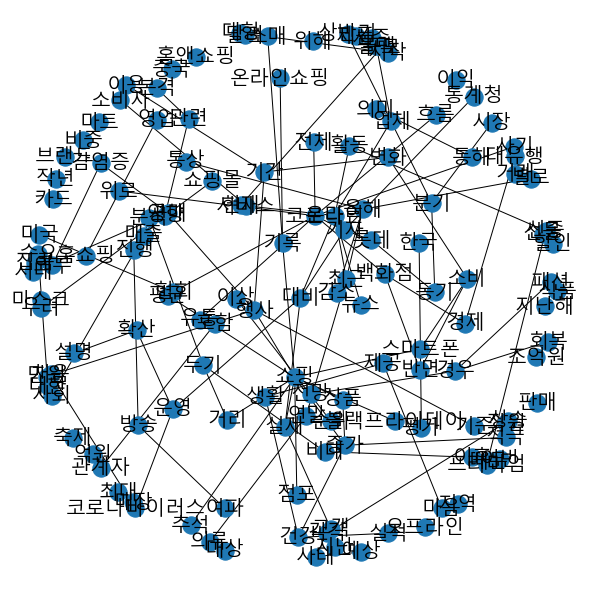

In [42]:
import nltk
from collections import Counter
from wordcloud import WordCloud
import nltk
from matplotlib import font_manager, rc

import networkx as nx

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize=(8,8))

# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# node_df의 키워드 빈도수를 데이터로 하여, 네트워크 그래프의 ‘노드’ 역할을 하는 원을 생성합니다.
for index, row in node_2020.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])

# network_df의 연관 분석 데이터를 기반으로, 네트워크 그래프의 ‘관계’ 역할을 하는 선을 생성합니다.
for index, row in network_2020.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

# 그래프 디자인과 관련된 파라미터를 설정합니다.
#pos = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, k=0.6, iterations=150)
#노드 크기 조정
nx.draw(G, pos=pos)

nx.draw_networkx_labels(G, pos=pos, font_family=font_name, font_size=20)

# 그래프를 출력합니다.
ax = plt.gca()
plt.show()

In [43]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

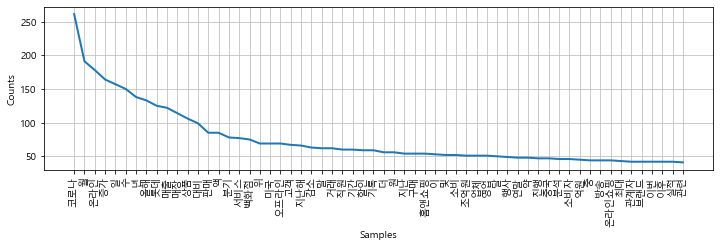

In [44]:
from nltk import Text
import matplotlib.pyplot as plt
from collections import Counter

plt.figure(figsize=(12, 3))
kolaw2 = Text(nouns_2020, name="kolaw")
kolaw2.plot(60)
plt.show()

워드 클라우드 시각화 내용

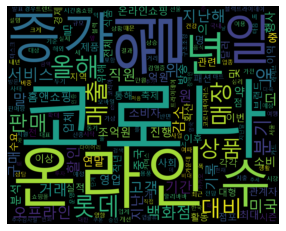

In [45]:
from wordcloud import WordCloud

# 자신의 컴퓨터 환경에 맞는 한글 폰트 경로를 설정
font_path = 'c:/Windows/Fonts/malgun.ttf'

wc = WordCloud(width = 1000, height = 800, background_color="Black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw2.vocab()), interpolation='bilinear')
plt.axis("off")
plt.show()

- 코로나, 쇼핑을 뺀 wordCLoud

In [46]:
corpus_2020 = "".join(real_contents['contentNew'].tolist())

In [49]:
not_conara = ['코로나', '코로나바이러스', '쇼핑', '데이','월','일','등']
word_list = ['사진', '뉴스', '기자', '쇼핑','제공','등','것','억원','조원','원']
media_list = mediaName['news_media'].tolist()

okt = Okt()
nouns_2020_coX = nouns_tagger.nouns(corpus_2020)
nouns_2020_coX = [noun for noun in nouns_2020_coX if noun not in not_conara]
nouns_2020_coX = [noun for noun in nouns_2020_coX if noun not in word_list]
nouns_2020_coX = [noun for noun in nouns_2020_coX if noun not in media_list]
nouns_2020_coX = [noun for noun in nouns_2020_coX if  len(noun) > 1]

count_2020_coX = Counter(nouns_2020_coX)

In [50]:
remove_char_counter_2020_coX = Counter({x : count_2020_coX[x] for x in count_2020_coX if len(x) > 1})

In [51]:
# 키워드와 키워드 빈도 점수를 ‘node’, ‘nodesize’ 라는 데이터 프레임의 피처로 생성합니다.
remove_char_counter_2020_coX.items()
node_df_coX = pd.DataFrame(remove_char_counter_2020_coX.items(), columns=['node', 'nodesize']) 
node_df_coX = node_df_coX[node_df_coX['nodesize'] >= 5] # 시각화의 편의를 위해 ‘nodesize’ 5 이하는 제거합니다.
node_df_coX

,node,nodesize
0,신세계,84
2,행사,62
4,진행,66
6,방송,108
7,그룹,12
...,...,...
2934,써니,5
2935,김재원,9
2937,원장,5
3152,웰니스,8


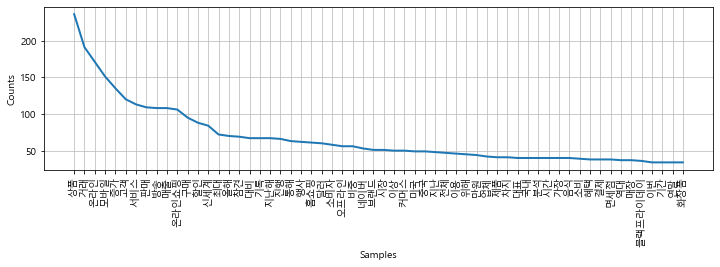

In [52]:
from nltk import Text
import matplotlib.pyplot as plt
from collections import Counter

plt.figure(figsize=(12, 3))
kolaw2020_coX = Text(nouns_2020_coX, name="kolaw")
kolaw2020_coX.plot(60)
plt.show()

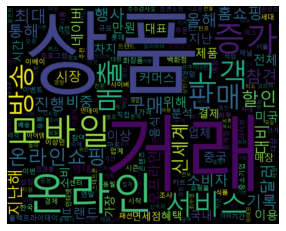

In [53]:
wc = WordCloud(width = 1000, height = 800, background_color="Black", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw2020_coX.vocab()), interpolation='bilinear')
plt.axis("off")
plt.show()

- 코로나, 쇼핑을 뺀 wordCLoud의 결과와 기존 2020년 기사의 wordCLoud 결과 비교하면 코로나, 쇼핑을 뺀 결과가 2020년 기사의 키워드를 더 잘 나타내진 것 같다. 

### 13주차 최종 발표 후 더 보충하고자 한 내용 : LDA 심화 

- CountVectorizer 클래스로 BoW 만들기

In [54]:
#corpus_2020 사용
corpus_BoW= real_contents['contentNew'].tolist()

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()

In [56]:
#코퍼스로부터 문서별 단어를 정수로 매핑하고, 단어의 빈도 수를 희소행렬(sparse martrix)로 변환
sp_mat = vector.fit_transform(corpus_BoW)
#numpy array로 보기
sp_mat.toarray()
#단어: 정수인덱스로 구성된 딕션너리
#vector.vocabulary_

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
words = pd.read_csv('capston/stop_words1.csv')

In [62]:
#불용어 제거
not_conara = ['코로나', '코로나바이러스', '쇼핑', '데이','월','일','등']
word_list = ['사진', '뉴스', '기자', '쇼핑','제공','등','것','억원','조원','원']
media_list = mediaName['news_media'].tolist()
media_list

result =[]
for i in not_conara:
    result.append(i)
    
for i in word_list:
    result.append(i)
    
for i in media_list:
    result.append(i)
    
for i in stopWord_1:
    result.append(i)
    
#result

In [63]:
# 불용어를 제거한 BoW 모델
stopWord_1 = words['word1'].values.tolist()
vector = CountVectorizer(stop_words= result)

print(vector.fit_transform(corpus_BoW).toarray()) 
#vector.vocabulary_

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\dajin\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['biz', 'ebs', 'it동아', 'jtbc', 'kbs', 'ktv', 'mbc', 'mbc연예', 'mbn', 'mhn스포츠', 'mk스포츠', 'osen', 'sbs', 'sbs연예뉴스', 'tv리포트', 'ytn', '가서', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '내집', '년도', '논하지', '누가', '다시', '대로', '대해', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '로드fc', '로피시엘', '만은', '만이', '말하면', '말할것도', '머니s', '몰라도', '몰랏다', '못하다', '바꾸어서', '바꿔', '밖에', '방면으로', '보도자료', '보면', '보아', '비길수', '비추어', '뿐만', '생각이다', '서술한바와같이', '시사in', '쓰여', '아니다', '아니라', '아웃도어', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않도록', '알겠는가', '없고', '없다', '연합뉴스tv', '예를', '외에', '우에', '월간', '위에서', '이와', '이유는', '임에', '있다', '전원속의', '점에서', '종합한것과같이', '주저하지', '줄은', '중앙sunday', '채널a', '코리아', '틀림없다', '편이', '하기', '하는', '하는것만', '하는것이', '하다', '하지', '한국경제tv', '함으로써', '해도', '해서는', '형식으로', '힘이'] not in stop_words.
  war

In [64]:
def tokenizer(raw_texts, pos=["Noun"], stopword= result):
    p = okt.pos(raw_texts, 
            norm=True,   # 정규화(normalization)
            stem=True    # 어간추출(stemming)
            )
    o = [word for word, tag in p if len(word) > 1 and tag in pos and word not in stopword]
    return(o)

In [67]:
from math import log # IDF 계산을 위해

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer(
    tokenizer=tokenizer, # 문장에 대한 tokenizer (위에 정의한 함수 이용)
    min_df=5,            # 단어가 출현하는 최소 문서의 개수
    sublinear_tf=True    # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
)

X = vectorize.fit_transform(corpus_BoW)
X.toarray()

array([[0.07268375, 0.        , 0.        , ..., 0.10506021, 0.        ,
        0.        ],
       [0.05834585, 0.18111443, 0.        , ..., 0.        , 0.07839028,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.12778932,
        0.        ]])

In [69]:
#90개의 기사를 표현하기위해 총 451개의 명사 형태의 단어가 사용
print(X.shape)

(90, 451)


- 코사인 유사도 

In [70]:
from sklearn.metrics.pairwise import linear_kernel
#코사인 유사도
cosine_sim = linear_kernel(X, X)
cosine_sim

array([[1.        , 0.18880043, 0.27466884, ..., 0.03036825, 0.03472501,
        0.15258846],
       [0.18880043, 1.        , 0.10137277, ..., 0.13114167, 0.15710995,
        0.22865896],
       [0.27466884, 0.10137277, 1.        , ..., 0.06765906, 0.06566891,
        0.03209448],
       ...,
       [0.03036825, 0.13114167, 0.06765906, ..., 1.        , 0.5149867 ,
        0.08024298],
       [0.03472501, 0.15710995, 0.06566891, ..., 0.5149867 , 1.        ,
        0.02280539],
       [0.15258846, 0.22865896, 0.03209448, ..., 0.08024298, 0.02280539,
        1.        ]])

In [71]:
indices = pd.Series(news_list4.index, index=news_list4['title']).drop_duplicates()
print(indices.head())

title
히트 상품도 바꾼 코로나..쇼핑 검색 1위는 '마스크'             0
변종 코로나에도 "쇼핑은 해야 돼~"                       1
코로나시대 쇼핑은 블랙프라이데이 대신 사이버 먼데이               2
롯데쇼핑, '코로나 블루' 극복 위한 맞춤 심리상담               3
[주말쇼핑포인트]코로나 시대 쇼핑은?..백화점 세일도 '언택트'가...    4
dtype: int64


In [72]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 기사의 타이틀로부터 해당되는 인덱스를 받아옵니다. 
    # 이제 선택한 기사를 가지고 연산할 수 있습니다.
    idx = indices[title]

    # 모든 기사에 대해서 해당 기사와의 유사도를 구합니다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 기사들을 정렬합니다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 기사를 받아옵니다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 기사의 인덱스를 받아옵니다.
    movie_indices = [i[0] for i in sim_scores]

    # 가장 유사한 10개의 기사의 제목을 리턴합니다.
    return news_list4['title'].iloc[movie_indices]

In [73]:
# 관련 기사 추천 결과

In [74]:
get_recommendations('변종 코로나에도 "쇼핑은 해야 돼~"')

74               코로나 폭락장에 쇼핑 큰손 변신..국민연금이 옳았다
12                         코로나 시대 '안심 쇼핑' 하세요
36    코로나 덕 보는 온라인쇼핑.. 10월 거래액 2019년비 20% '쑥'
46    롯데쇼핑 코로나19에도 3분기 순이익 흑자전환 ..가전·건강식품 ...
37          '코로나 집콕'에 온라인쇼핑 거래액 3개월 연속 14조 원대
45     롯데쇼핑, 코로나에 실적 곤두박질..'비효율점포' 도려내 체질개...
52    롯데쇼핑, '코로나' 속 선방..3Q 영업익 전년比 26.8%↑(종합)
40             홈앤쇼핑, 코로나19 시대 패션 경쟁력은 '고급 소재'
19         백화점을 손으로 둘러보고 쇼핑, 코로나가 앞당긴 가상매장 시대
39              매장 쇼핑처럼 실감..코로나에 각광받는 '가상 쇼핑'
Name: title, dtype: object

In [75]:
get_recommendations("롯데쇼핑, '코로나 블루' 극복 위한 맞춤 심리상담")

25            코로나가 앞당긴 롯데쇼핑 다이어트.. 다음은 '온라인'?
49                 코로나가 바꾼 '블프'..매장방문↓ 온라인쇼핑↑
7     롯데쇼핑, 코로나 블루로 지친 마음 돌본다..'비대면 심리상담소'...
11                    코로나 팬데믹속 온라인 쇼핑 붐..내년은?
61                 홈앤쇼핑, 코로나19 극복 지역경제 살리기 나서
39              매장 쇼핑처럼 실감..코로나에 각광받는 '가상 쇼핑'
68            코로나에 막힌 세계 여행지 쇼핑, '해외 직구'로 달랜다
0              히트 상품도 바꾼 코로나..쇼핑 검색 1위는 '마스크'
60       코로나 비대면 쇼핑 늘었다..롯데백화점몰 매출 전년比 66% 신장
54           홈앤쇼핑, 코로나19 장기화 침체된 패션 시장 살리기 앞장
Name: title, dtype: object

### Topic Modeling(토픽 모델링)

토픽 갯수를 임의로 지정하고 만들어낸 토픽 모델링의 결과

In [76]:
n = X.toarray()

In [77]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components= 6, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

6

In [78]:
np.shape(svd_model.components_)

(6, 451)

In [79]:
terms = vectorize.get_feature_names() # 단어 집합. 

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('거래', 0.19421), ('온라인쇼핑', 0.17564), ('증가', 0.17561), ('모바일', 0.17494), ('상품', 0.16519)]
Topic 2: [('온라인쇼핑', 0.26991), ('거래', 0.2362), ('증가', 0.17771), ('음식', 0.1554), ('비중', 0.15232)]
Topic 3: [('참견', 0.35969), ('민경훈', 0.22422), ('이상민', 0.22402), ('황광희', 0.1995), ('송해나', 0.19614)]
Topic 4: [('달러', 0.23727), ('미국', 0.22827), ('블랙프라이데이', 0.20831), ('매출', 0.18567), ('추수감사절', 0.18454)]
Topic 5: [('할인', 0.19694), ('혜택', 0.19362), ('신세계', 0.1862), ('만원', 0.14353), ('이벤트', 0.12549)]
Topic 6: [('라이브', 0.22603), ('신세계', 0.21001), ('방송', 0.17096), ('시작', 0.12522), ('공연', 0.12117)]


#### LDA 

LDA = 주어진 문서에 대하여 각 문서에 어떤 주제들이 존재하는지에 대한 확률모형

In [17]:
import pandas as pd
import numpy as np
import string
import os
import glob
import matplotlib.pyplot as plt
from pprint import pprint

In [18]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models import LdaModel

### 에러 남!

In [1]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim

C:\Users\dajin\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\dajin\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [85]:
# Split words in news aticles
news = real_contents2020['news_text'].tolist()
news = [sent.split(',') for sent in news]
display(len(news))

75

In [86]:
# Create Dictionary
id2word = corpora.Dictionary(news)

# Create Corpus
texts = news

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus)

[[(0, 1)], [(1, 1)], [(2, 1)], [(3, 1)], [(4, 1)], [(5, 1)], [(6, 1)], [(7, 1)], [(8, 1)], [(9, 1)], [(10, 1)], [(11, 1)], [(12, 1)], [(13, 1)], [(14, 1)], [(15, 1)], [(16, 1)], [(17, 1)], [(18, 1)], [(19, 1)], [(20, 1)], [(21, 1)], [(22, 1)], [(23, 1)], [(24, 1)], [(25, 1)], [(26, 1)], [(27, 1)], [(28, 1)], [(29, 1)], [(30, 1)], [(31, 1)], [(32, 1)], [(33, 1)], [(34, 1)], [(35, 1)], [(36, 1)], [(37, 1)], [(38, 1)], [(39, 1)], [(40, 1)], [(41, 1)], [(42, 1)], [(43, 1)], [(44, 1)], [(45, 1)], [(46, 1)], [(47, 1)], [(48, 1)], [(49, 1)], [(50, 1)], [(51, 1)], [(52, 1)], [(53, 1)], [(54, 1)], [(55, 1)], [(56, 1)], [(57, 1)], [(58, 1)], [(59, 1)], [(60, 1)], [(61, 1)], [(62, 1)], [(63, 1)], [(64, 1)], [(65, 1)], [(66, 1)], [(67, 1)], [(68, 1)], [(69, 1)], [(70, 1)], [(71, 1)], [(72, 1)], [(73, 1)], [(74, 1)]]


In [87]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      print(num_topics)
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics, 
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=41, step=2)

2


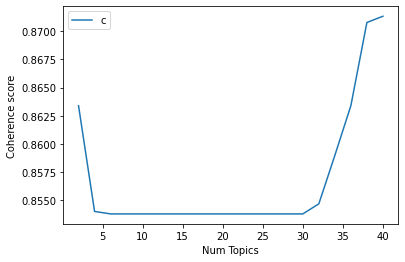

In [24]:
limit=41; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [25]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.8634
Num Topics = 4  has Coherence Value of 0.854
Num Topics = 6  has Coherence Value of 0.8538
Num Topics = 8  has Coherence Value of 0.8538
Num Topics = 10  has Coherence Value of 0.8538
Num Topics = 12  has Coherence Value of 0.8538
Num Topics = 14  has Coherence Value of 0.8538
Num Topics = 16  has Coherence Value of 0.8538
Num Topics = 18  has Coherence Value of 0.8538
Num Topics = 20  has Coherence Value of 0.8538
Num Topics = 22  has Coherence Value of 0.8538
Num Topics = 24  has Coherence Value of 0.8538
Num Topics = 26  has Coherence Value of 0.8538
Num Topics = 28  has Coherence Value of 0.8538
Num Topics = 30  has Coherence Value of 0.8538
Num Topics = 32  has Coherence Value of 0.8547
Num Topics = 34  has Coherence Value of 0.859
Num Topics = 36  has Coherence Value of 0.8634
Num Topics = 38  has Coherence Value of 0.8708
Num Topics = 40  has Coherence Value of 0.8713


토픽의 갯수가 2개 혹은 36개 혹은 40개가 나왔음 이를 확인해보기 위한 pyLDAvis.enable_notebook()를 통해 Visualize the topics 실행 

In [27]:
# Select the model and print the topics
optimal_model = model_list[0]
model_topics = optimal_model.show_topics(formatted=False)
#pprint(optimal_model.print_topics(num_words=10))

In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

NameError: name 'pyLDAvis' is not defined

#### pyLDAvis를 설치하는 과정 후 pyLDAvis.gensim의 부분에서 에러남 

_____________________________________________________________________________________________________________________________________________________________________

#### 추가적으로 해야하는 데이터 셋 [2020- 언론사 뉴스] - 언론사 탐색 필수 - 1학기 여기는 해결하지 못함

In [ ]:
news_list3 = []
for n in range(1, 10):
    raw3 = requests.get("https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%EC%BD%94%EB%A1%9C%EB%82%98%20%EC%87%BC%ED%95%91&sd=20200101000000&ed=20201230235959&period=u&p="+str(n))
    html3 = BeautifulSoup(raw3.text, 'html.parser')

    articles3 = html3.select("div.wrap_cont")

    for ar3 in articles3:
        news_data3={}
        title = ar3.select_one("a.f_link_b").text
        summary = ar3.select_one("p.f_eb.desc").text
        summaryUrl = ar3.select_one("a.f_link_b")['href']
        summaryUrl_Daum = ar3.select_one("a.f_nb")['href']
        source = ar3.select_one("span.f_nb.date").text
        news_data3['title'] = ar3.select_one("a.f_link_b").text
        news_list3.append(news_data3)
        news_data3['source'] = ar3.select_one("p.f_eb.desc").text
        news_list3.append(news_data3)
        news_data3['content'] = ar3.select_one("a.f_link_b")['href']
        news_list3.append(news_data3)
        news_data3['content_Daum'] = ar3.select_one("a.f_nb")['href']
        news_list3.append(news_data3)
        news_data3['media'] = ar3.select_one("span.f_nb.date").text
        news_list3.append(news_data3)
        
        
        #print(title)
        #print(summary)
        #print(summaryUrl)
        # 기사별로 구분을 위해 구분선 삽입 
        #print("="*50)

In [329]:
news_list3 = pd.DataFrame(news_list3)
news_list3.drop_duplicates()

,title,source,content,media
0,히트 상품도 바꾼 코로나..쇼핑 검색 1위는 '마스크',[서울=뉴시스] 손정빈 기자 = 코로나 사태가 쇼핑 검색어를 바꿔놨다. TV홈쇼핑 ...,http://v.media.daum.net/v/20201214091912595?f=o,2020.12.14 | 뉴시스 | 다음뉴스
4,"변종 코로나에도 ""쇼핑은 해야 돼~""",정부가 영국에서 유행 중인 코로나19 변이 바이러스의 국내 전파를 차단하기 위해 연...,http://v.media.daum.net/v/20201227095935260?f=o,2020.12.27 | 머니S | 다음뉴스
8,코로나시대 쇼핑은 블랙프라이데이 대신 사이버 먼데이,[이미지출처=EPA연합뉴스] [아시아경제 뉴욕=백종민 특파원] 신종 코로나바이러스 ...,http://v.media.daum.net/v/20201202053011409?f=o,2020.12.02 | 아시아경제 | 다음뉴스
12,"롯데쇼핑, '코로나 블루' 극복 위한 맞춤 심리상담",비대면으로 심리 상담을 받고 있다.롯데쇼핑 제공 롯데쇼핑이 직원들을 대상으로 코로나...,http://v.media.daum.net/v/20201230050728487?f=o,2020.12.30 | 서울신문 | 다음뉴스
16,"롯데쇼핑, '코로나 블루' 극복 위한 임직원 심리 상담",롯데백화점 비대면 심리상담 롯데쇼핑이 직원들을 대상으로 '코로나 블루' 극복을 위한...,http://v.media.daum.net/v/20201222094603570?f=o,2020.12.22 | 전자신문 | 다음뉴스
...,...,...,...,...
340,코로나19에 온라인쇼핑 확산..광주 대형소매점 매출 뚝,지역 대형소매점 판매동향. © News1 (광주=뉴스1) 박영래 기자 = 코로나19...,http://v.media.daum.net/v/20201126092750011?f=o,2020.11.26 | 뉴스1 | 다음뉴스
344,코로나 걷히면 온라인쇼핑 꺼질까…업계는 플랫폼 전환 가속,[뉴스토마토 이재영 기자] 코로나 영향으로 온라인 쇼핑이 폭증한 소비형태 변화에 온...,https://cp.news.search.daum.net/p/99434271,2020.11.11 | 뉴스토마토
348,"""전혀 공영(公營)스럽지 않은 이름뿐인 '공영쇼핑'""…'코로나 차...","두고 차별하고 있다""며 직원들의 원성이 높아지고 있는 것이다. 현재 공영쇼핑은 코로...",https://cp.news.search.daum.net/p/100267482,2020.12.03 | 뉴시안
352,"롯데쇼핑, 코로나 속 몸집줄이기 박차...롭스, 롯데마트 사업부로...",내지 못했다. 실제 롭스가 포함된 롯데쇼핑의 기타 사업부문은 올해 3분기까지 총.....,https://cp.news.search.daum.net/p/100826996,2020.12.17 | FETV


In [ ]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    
    return result

real_contents['contentNew'] = news_content['contentNew'].apply(lambda x: text_cleaning(x))
news_content 